In [1]:
# check epoch is 3000
# check no reset graph
# check save path index

/Users/heyuhao/Documents/GitHub/school_project/cz4042/assignment2/assignment2_question_b


In [2]:
!ls

other        part_b.ipynb temp.ipynb


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score
import re
import string
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))
import datetime
import matplotlib.pyplot as plt
import os

In [5]:
MAX_DOCUMENT_LENGTH=100

csv_path = '/Users/heyuhao/Desktop/y3s1/original/19S1-CE4042-CZ4042-NEURAL-NETWORK-DEEP-LEARNING/Assignments'

df_train = pd.read_csv(os.path.join(csv_path, 'train_medium.csv'), names=['class', '_', 'text'], usecols=['class', 'text'])
df_test = pd.read_csv(os.path.join(csv_path, 'test_medium.csv'), names=['class', '_', 'text'], usecols=['class', 'text'])

train_data = df_train.values
test_data = df_test.values

def clean_text(t):
    #lowercase
    t= t.lower()
    #remove number and punctuation
    t = re.sub(r'([^\w\s])|\d','',t)
    #remove white space
    t = re.sub(r'\s+',' ',t)
    #remove stopwords
    t = ' '.join([t for t in t.split(' ') if t not in stopwords])
    t = t.strip()
    return t

for pair in train_data:
    pair[1] = clean_text(pair[1])
for pair in test_data:
    pair[1] = clean_text(pair[1])
    
train_data = np.array(train_data)
test_data = np.array(test_data)
    
x_train = pd.Series(train_data.T[1])
y_train = pd.Series(train_data.T[0])
x_test = pd.Series(test_data.T[1])
y_test = pd.Series(test_data.T[0])

# # cnn features
char_processor = tf.contrib.learn.preprocessing.ByteProcessor(MAX_DOCUMENT_LENGTH)
x_train_cnn = np.array(list(char_processor.fit_transform(x_train)))
x_test_cnn = np.array(list(char_processor.transform(x_test)))
y_train_cnn = np.array(y_train.values)
y_test_cnn = np.array(y_test.values)

# np.save(os.path.join('other', 'npy', 'x_train_cnn.npy'), x_train_cnn)
# np.save(os.path.join('other', 'npy', 'x_test_cnn.npy'), x_test_cnn)
# np.save(os.path.join('other', 'npy', 'y_train_cnn.npy'), y_train_cnn)
# np.save(os.path.join('other', 'npy', 'y_test_cnn.npy'), y_test_cnn)


# rnn features
vocab_processor=tf.contrib.learn.preprocessing.VocabularyProcessor(MAX_DOCUMENT_LENGTH)
x_train_rnn = np.array(list(vocab_processor.fit_transform(x_train)))
x_test_rnn = np.array(list(vocab_processor.transform(x_test)))
y_train_rnn = np.array(y_train.values)
y_test_rnn = np.array(y_test.values)
no_words = len(vocab_processor.vocabulary_)

# np.save(os.path.join('other', 'npy', 'x_train_rnn.npy'), x_train_rnn)
# np.save(os.path.join('other', 'npy', 'x_test_rnn.npy'), x_test_rnn)
# np.save(os.path.join('other', 'npy', 'y_train_rnn.npy'), y_train_rnn)
# np.save(os.path.join('other', 'npy', 'y_test_rnn.npy'), y_test_rnn)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Instructions for updating:
Please use tensorflow/transform or tf.data.


Instructions for updating:
Please use tensorflow/transform or tf.data.


Instructions for updating:
Please use tensorflow/transform or tf.data.


Instructions for updating:
Please use tensorflow/transform or tf.data.


Instructions for updating:
Please use tensorflow/transform or tf.data.


Instructions for updating:
Please use tensorflow/transform or tf.data.


Instructions for updating:
Please use tensorflow/transform or tf.data.


Instructions for updating:
Please use tensorflow/transform or tf.data.


Instructions for updating:
Please use tensorflow/transform or tf.data.


Instructions for updating:
Please use tensorflow/transform or tf.data.


In [6]:
no_words

34016

## Class / Function

In [3]:
class TimeRecoder():
    start_time = 0
    end_time = 0
    
    def start(self):
        self.start_time = datetime.datetime.now()
        print('\n\n', '-'*10, ' START ', '-'*10, self.start_time, '\n\n')
        
    def end(self):
        self.end_time = datetime.datetime.now()
        print('\n\n', '-'*10, ' END ', '-'*10, self.end_time, '\n\n')
        self.checkTimeSpan()
        
    def checkTimeSpan(self):
        print('\n\n', '-'*10, ' TAKES ', '-'*10, self.end_time - self.start_time, '\n\n')

## Load Data For Q1,2

In [11]:
x_train = np.load(os.path.join('other', 'npy', 'x_train_cnn.npy'), allow_pickle=True)
x_test = np.load(os.path.join('other', 'npy', 'x_test_cnn.npy'), allow_pickle=True)
y_train = np.load(os.path.join('other', 'npy', 'y_train_cnn.npy'), allow_pickle=True)
y_test = np.load(os.path.join('other', 'npy', 'y_test_cnn.npy'), allow_pickle=True)

## Q1 CNN on cnn index

In [15]:
MAX_DOCUMENT_LENGTH = 100
N_FILTERS = 10
FILTER_SHAPE1 = [20, 256]
FILTER_SHAPE2 = [20, 1]
POOLING_WINDOW = 4
POOLING_STRIDE = 2
MAX_LABEL = 15
no_epochs = 3000
lr = 0.01

tf.reset_default_graph()

def char_cnn_model(x):
  
    input_layer = tf.reshape(
      tf.one_hot(x, 256), [-1, MAX_DOCUMENT_LENGTH, 256, 1])

    with tf.variable_scope('CNN_Layer1'):
        conv1 = tf.layers.conv2d(
            input_layer,
            filters=N_FILTERS,
            kernel_size=FILTER_SHAPE1,
            padding='VALID',
            activation=tf.nn.relu)
        pool1 = tf.layers.max_pooling2d(
            conv1,
            pool_size=POOLING_WINDOW,
            strides=POOLING_STRIDE,
            padding='SAME')
        
    with tf.variable_scope('CNN_Layer2'):
        conv2 = tf.layers.conv2d(
            pool1,
            filters=N_FILTERS,
            kernel_size=FILTER_SHAPE2,
            padding='VALID',
            activation=tf.nn.relu)
        pool2 = tf.layers.max_pooling2d(
            conv2,
            pool_size=POOLING_WINDOW,
            strides=POOLING_STRIDE,
            padding='SAME')

    dim = pool2.get_shape()[1].value * pool2.get_shape()[2].value * pool2.get_shape()[3].value 
    
    with tf.variable_scope('CNN_Flatten'):
        flatten = tf.reshape(pool2, [-1, dim])
    
    with tf.variable_scope('ANN'):
        W1 = tf.Variable(tf.truncated_normal([dim, MAX_LABEL], stddev=1.0/np.sqrt(dim)))
        b1 = tf.Variable(tf.zeros([MAX_LABEL]))
        logits = tf.matmul(flatten, W1) + b1


    return input_layer, conv1, pool1, conv2, pool2, flatten, logits

# Create the model
x = tf.placeholder(tf.int64, [None, MAX_DOCUMENT_LENGTH])
y_ = tf.placeholder(tf.int64)

inputs, conv1, pool1, conv2, pool2, flatten, logits = char_cnn_model(x)

# Optimizer
entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=tf.one_hot(y_, MAX_LABEL), logits=logits))
train_op = tf.train.AdamOptimizer(lr).minimize(entropy)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())

print('input: ', sess.run([tf.shape(inputs)], {x: x_train, y_: y_train}))
print('conv1: ', sess.run([tf.shape(conv1)], {x: x_train, y_: y_train}))
print('pool1: ', sess.run([tf.shape(pool1)], {x: x_train, y_: y_train}))
print('conv2: ', sess.run([tf.shape(conv2)], {x: x_train, y_: y_train}))
print('pool2: ', sess.run([tf.shape(pool2)], {x: x_train, y_: y_train}))
print('flatten: ', sess.run([tf.shape(flatten)], {x: x_train, y_: y_train}))
print('logits: ', sess.run([tf.shape(logits)], {x: x_train, y_: y_train}))

# entropy_on_training = []
# accuracy_on_testing = []

timeRecoder = TimeRecoder()
timeRecoder.start()

# for e in range(no_epochs):
    
#     # training
#     _, loss_  = sess.run([train_op, entropy], {x: x_train, y_: y_train})
#     entropy_on_training.append(loss_)
    
#     # testing
#     predict = sess.run([logits], {x: x_test})
#     accuracy_on_testing.append(accuracy_score(list(y_test), list(np.argmax(np.array(predict[0]), axis=1))))
    
     
#     print('epoch %d: entropy: %f, accuracy: %f' % (e, entropy_on_training[-1], accuracy_on_testing[-1]))
    
timeRecoder.end()

# np.save(os.path.join('other', 'npy', 'entropy_on_training_q1.npy'), np.array(entropy_on_training))
# np.save(os.path.join('other', 'npy', 'accuracy_on_testing_q1.npy'), np.array(accuracy_on_testing))

input:  [array([5600,  100,  256,    1], dtype=int32)]
conv1:  [array([5600,   81,    1,   10], dtype=int32)]
pool1:  [array([5600,   41,    1,   10], dtype=int32)]
conv2:  [array([5600,   22,    1,   10], dtype=int32)]
pool2:  [array([5600,   11,    1,   10], dtype=int32)]
flatten:  [array([5600,  110], dtype=int32)]
logits:  [array([5600,   15], dtype=int32)]


 ----------  START  ---------- 2019-11-13 23:15:31.126943 


epoch 0: entropy: 2.712432, accuracy: 0.070000
epoch 1: entropy: 2.700954, accuracy: 0.078571
epoch 2: entropy: 2.669701, accuracy: 0.074286
epoch 3: entropy: 2.629597, accuracy: 0.104286
epoch 4: entropy: 2.577609, accuracy: 0.135714
epoch 5: entropy: 2.517280, accuracy: 0.157143
epoch 6: entropy: 2.464539, accuracy: 0.204286
epoch 7: entropy: 2.379198, accuracy: 0.244286
epoch 8: entropy: 2.308412, accuracy: 0.230000
epoch 9: entropy: 2.235305, accuracy: 0.247143
epoch 10: entropy: 2.184813, accuracy: 0.235714
epoch 11: entropy: 2.260955, accuracy: 0.224286
epoch 1

epoch 161: entropy: 0.141013, accuracy: 0.622857
epoch 162: entropy: 0.136342, accuracy: 0.624286
epoch 163: entropy: 0.134492, accuracy: 0.617143
epoch 164: entropy: 0.134071, accuracy: 0.618571
epoch 165: entropy: 0.129599, accuracy: 0.621429
epoch 166: entropy: 0.128790, accuracy: 0.618571
epoch 167: entropy: 0.125510, accuracy: 0.614286
epoch 168: entropy: 0.124287, accuracy: 0.630000
epoch 169: entropy: 0.122410, accuracy: 0.624286
epoch 170: entropy: 0.119228, accuracy: 0.618571
epoch 171: entropy: 0.118126, accuracy: 0.625714
epoch 172: entropy: 0.115616, accuracy: 0.628571
epoch 173: entropy: 0.114276, accuracy: 0.625714
epoch 174: entropy: 0.112245, accuracy: 0.624286
epoch 175: entropy: 0.109790, accuracy: 0.628571
epoch 176: entropy: 0.108657, accuracy: 0.628571
epoch 177: entropy: 0.106490, accuracy: 0.618571
epoch 178: entropy: 0.104991, accuracy: 0.624286
epoch 179: entropy: 0.103289, accuracy: 0.622857
epoch 180: entropy: 0.101134, accuracy: 0.620000
epoch 181: entropy: 

epoch 329: entropy: 0.014206, accuracy: 0.618571
epoch 330: entropy: 0.014074, accuracy: 0.618571
epoch 331: entropy: 0.013943, accuracy: 0.618571
epoch 332: entropy: 0.013814, accuracy: 0.618571
epoch 333: entropy: 0.013687, accuracy: 0.618571
epoch 334: entropy: 0.013561, accuracy: 0.618571
epoch 335: entropy: 0.013438, accuracy: 0.618571
epoch 336: entropy: 0.013315, accuracy: 0.618571
epoch 337: entropy: 0.013195, accuracy: 0.618571
epoch 338: entropy: 0.013076, accuracy: 0.618571
epoch 339: entropy: 0.012959, accuracy: 0.618571
epoch 340: entropy: 0.012844, accuracy: 0.618571
epoch 341: entropy: 0.012730, accuracy: 0.618571
epoch 342: entropy: 0.012618, accuracy: 0.618571
epoch 343: entropy: 0.012507, accuracy: 0.620000
epoch 344: entropy: 0.012398, accuracy: 0.620000
epoch 345: entropy: 0.012290, accuracy: 0.620000
epoch 346: entropy: 0.012183, accuracy: 0.620000
epoch 347: entropy: 0.012078, accuracy: 0.620000
epoch 348: entropy: 0.011974, accuracy: 0.620000
epoch 349: entropy: 

epoch 497: entropy: 0.004487, accuracy: 0.621429
epoch 498: entropy: 0.004462, accuracy: 0.621429
epoch 499: entropy: 0.004430, accuracy: 0.622857
epoch 500: entropy: 0.004398, accuracy: 0.622857
epoch 501: entropy: 0.004381, accuracy: 0.620000
epoch 502: entropy: 0.004359, accuracy: 0.620000
epoch 503: entropy: 0.004327, accuracy: 0.622857
epoch 504: entropy: 0.004295, accuracy: 0.622857
epoch 505: entropy: 0.004273, accuracy: 0.622857
epoch 506: entropy: 0.004253, accuracy: 0.622857
epoch 507: entropy: 0.004225, accuracy: 0.622857
epoch 508: entropy: 0.004203, accuracy: 0.622857
epoch 509: entropy: 0.004181, accuracy: 0.624286
epoch 510: entropy: 0.004162, accuracy: 0.624286
epoch 511: entropy: 0.004139, accuracy: 0.622857
epoch 512: entropy: 0.004116, accuracy: 0.622857
epoch 513: entropy: 0.004093, accuracy: 0.622857
epoch 514: entropy: 0.004073, accuracy: 0.622857
epoch 515: entropy: 0.004054, accuracy: 0.624286
epoch 516: entropy: 0.004031, accuracy: 0.622857
epoch 517: entropy: 

epoch 665: entropy: 0.002119, accuracy: 0.620000
epoch 666: entropy: 0.002111, accuracy: 0.620000
epoch 667: entropy: 0.002103, accuracy: 0.620000
epoch 668: entropy: 0.002095, accuracy: 0.620000
epoch 669: entropy: 0.002088, accuracy: 0.620000
epoch 670: entropy: 0.002080, accuracy: 0.620000
epoch 671: entropy: 0.002072, accuracy: 0.620000
epoch 672: entropy: 0.002065, accuracy: 0.620000
epoch 673: entropy: 0.002057, accuracy: 0.618571
epoch 674: entropy: 0.002050, accuracy: 0.618571
epoch 675: entropy: 0.002042, accuracy: 0.618571
epoch 676: entropy: 0.002035, accuracy: 0.618571
epoch 677: entropy: 0.002028, accuracy: 0.618571
epoch 678: entropy: 0.002020, accuracy: 0.618571
epoch 679: entropy: 0.002013, accuracy: 0.618571
epoch 680: entropy: 0.002006, accuracy: 0.618571
epoch 681: entropy: 0.001998, accuracy: 0.618571
epoch 682: entropy: 0.001991, accuracy: 0.618571
epoch 683: entropy: 0.001984, accuracy: 0.618571
epoch 684: entropy: 0.001977, accuracy: 0.618571
epoch 685: entropy: 

epoch 833: entropy: 0.001233, accuracy: 0.617143
epoch 834: entropy: 0.001229, accuracy: 0.617143
epoch 835: entropy: 0.001226, accuracy: 0.617143
epoch 836: entropy: 0.001222, accuracy: 0.617143
epoch 837: entropy: 0.001219, accuracy: 0.617143
epoch 838: entropy: 0.001216, accuracy: 0.617143
epoch 839: entropy: 0.001212, accuracy: 0.617143
epoch 840: entropy: 0.001209, accuracy: 0.617143
epoch 841: entropy: 0.001205, accuracy: 0.617143
epoch 842: entropy: 0.001202, accuracy: 0.617143
epoch 843: entropy: 0.001199, accuracy: 0.615714
epoch 844: entropy: 0.001195, accuracy: 0.615714
epoch 845: entropy: 0.001192, accuracy: 0.615714
epoch 846: entropy: 0.001189, accuracy: 0.615714
epoch 847: entropy: 0.001186, accuracy: 0.615714
epoch 848: entropy: 0.001182, accuracy: 0.615714
epoch 849: entropy: 0.001179, accuracy: 0.615714
epoch 850: entropy: 0.001176, accuracy: 0.615714
epoch 851: entropy: 0.001173, accuracy: 0.615714
epoch 852: entropy: 0.001169, accuracy: 0.615714
epoch 853: entropy: 

epoch 1001: entropy: 0.000807, accuracy: 0.620000
epoch 1002: entropy: 0.000805, accuracy: 0.620000
epoch 1003: entropy: 0.000803, accuracy: 0.620000
epoch 1004: entropy: 0.000801, accuracy: 0.620000
epoch 1005: entropy: 0.000799, accuracy: 0.620000
epoch 1006: entropy: 0.000798, accuracy: 0.620000
epoch 1007: entropy: 0.000796, accuracy: 0.620000
epoch 1008: entropy: 0.000794, accuracy: 0.620000
epoch 1009: entropy: 0.000792, accuracy: 0.620000
epoch 1010: entropy: 0.000790, accuracy: 0.620000
epoch 1011: entropy: 0.000789, accuracy: 0.620000
epoch 1012: entropy: 0.000787, accuracy: 0.620000
epoch 1013: entropy: 0.000785, accuracy: 0.620000
epoch 1014: entropy: 0.000783, accuracy: 0.620000
epoch 1015: entropy: 0.000782, accuracy: 0.620000
epoch 1016: entropy: 0.000780, accuracy: 0.620000
epoch 1017: entropy: 0.000778, accuracy: 0.620000
epoch 1018: entropy: 0.000776, accuracy: 0.620000
epoch 1019: entropy: 0.000775, accuracy: 0.620000
epoch 1020: entropy: 0.000773, accuracy: 0.620000


epoch 1165: entropy: 0.000571, accuracy: 0.622857
epoch 1166: entropy: 0.000570, accuracy: 0.622857
epoch 1167: entropy: 0.000569, accuracy: 0.622857
epoch 1168: entropy: 0.000567, accuracy: 0.622857
epoch 1169: entropy: 0.000566, accuracy: 0.622857
epoch 1170: entropy: 0.000565, accuracy: 0.622857
epoch 1171: entropy: 0.000564, accuracy: 0.622857
epoch 1172: entropy: 0.000563, accuracy: 0.622857
epoch 1173: entropy: 0.000562, accuracy: 0.622857
epoch 1174: entropy: 0.000561, accuracy: 0.622857
epoch 1175: entropy: 0.000560, accuracy: 0.622857
epoch 1176: entropy: 0.000559, accuracy: 0.622857
epoch 1177: entropy: 0.000558, accuracy: 0.622857
epoch 1178: entropy: 0.000557, accuracy: 0.622857
epoch 1179: entropy: 0.000556, accuracy: 0.622857
epoch 1180: entropy: 0.000554, accuracy: 0.622857
epoch 1181: entropy: 0.000553, accuracy: 0.622857
epoch 1182: entropy: 0.000552, accuracy: 0.622857
epoch 1183: entropy: 0.000551, accuracy: 0.622857
epoch 1184: entropy: 0.000550, accuracy: 0.622857


epoch 1329: entropy: 0.000423, accuracy: 0.625714
epoch 1330: entropy: 0.000423, accuracy: 0.625714
epoch 1331: entropy: 0.000422, accuracy: 0.625714
epoch 1332: entropy: 0.000421, accuracy: 0.625714
epoch 1333: entropy: 0.000420, accuracy: 0.625714
epoch 1334: entropy: 0.000420, accuracy: 0.625714
epoch 1335: entropy: 0.000419, accuracy: 0.625714
epoch 1336: entropy: 0.000418, accuracy: 0.625714
epoch 1337: entropy: 0.000417, accuracy: 0.625714
epoch 1338: entropy: 0.000417, accuracy: 0.625714
epoch 1339: entropy: 0.000416, accuracy: 0.625714
epoch 1340: entropy: 0.000415, accuracy: 0.625714
epoch 1341: entropy: 0.000415, accuracy: 0.625714
epoch 1342: entropy: 0.000414, accuracy: 0.625714
epoch 1343: entropy: 0.000413, accuracy: 0.625714
epoch 1344: entropy: 0.000413, accuracy: 0.625714
epoch 1345: entropy: 0.000412, accuracy: 0.625714
epoch 1346: entropy: 0.000411, accuracy: 0.625714
epoch 1347: entropy: 0.000410, accuracy: 0.625714
epoch 1348: entropy: 0.000410, accuracy: 0.625714


epoch 1493: entropy: 0.000325, accuracy: 0.625714
epoch 1494: entropy: 0.000324, accuracy: 0.625714
epoch 1495: entropy: 0.000324, accuracy: 0.625714
epoch 1496: entropy: 0.000323, accuracy: 0.625714
epoch 1497: entropy: 0.000323, accuracy: 0.625714
epoch 1498: entropy: 0.000322, accuracy: 0.625714
epoch 1499: entropy: 0.000322, accuracy: 0.625714
epoch 1500: entropy: 0.000321, accuracy: 0.625714
epoch 1501: entropy: 0.000321, accuracy: 0.625714
epoch 1502: entropy: 0.000320, accuracy: 0.625714
epoch 1503: entropy: 0.000320, accuracy: 0.625714
epoch 1504: entropy: 0.000319, accuracy: 0.625714
epoch 1505: entropy: 0.000319, accuracy: 0.625714
epoch 1506: entropy: 0.000318, accuracy: 0.625714
epoch 1507: entropy: 0.000318, accuracy: 0.625714
epoch 1508: entropy: 0.000317, accuracy: 0.625714
epoch 1509: entropy: 0.000317, accuracy: 0.625714
epoch 1510: entropy: 0.000316, accuracy: 0.625714
epoch 1511: entropy: 0.000316, accuracy: 0.625714
epoch 1512: entropy: 0.000315, accuracy: 0.625714


epoch 1657: entropy: 0.000256, accuracy: 0.625714
epoch 1658: entropy: 0.000255, accuracy: 0.625714
epoch 1659: entropy: 0.000255, accuracy: 0.625714
epoch 1660: entropy: 0.000255, accuracy: 0.625714
epoch 1661: entropy: 0.000254, accuracy: 0.625714
epoch 1662: entropy: 0.000254, accuracy: 0.625714
epoch 1663: entropy: 0.000253, accuracy: 0.625714
epoch 1664: entropy: 0.000253, accuracy: 0.625714
epoch 1665: entropy: 0.000253, accuracy: 0.625714
epoch 1666: entropy: 0.000252, accuracy: 0.625714
epoch 1667: entropy: 0.000252, accuracy: 0.625714
epoch 1668: entropy: 0.000252, accuracy: 0.625714
epoch 1669: entropy: 0.000251, accuracy: 0.625714
epoch 1670: entropy: 0.000251, accuracy: 0.625714
epoch 1671: entropy: 0.000251, accuracy: 0.625714
epoch 1672: entropy: 0.000250, accuracy: 0.625714
epoch 1673: entropy: 0.000250, accuracy: 0.625714
epoch 1674: entropy: 0.000250, accuracy: 0.625714
epoch 1675: entropy: 0.000249, accuracy: 0.625714
epoch 1676: entropy: 0.000249, accuracy: 0.625714


epoch 1821: entropy: 0.000205, accuracy: 0.625714
epoch 1822: entropy: 0.000205, accuracy: 0.625714
epoch 1823: entropy: 0.000205, accuracy: 0.625714
epoch 1824: entropy: 0.000205, accuracy: 0.625714
epoch 1825: entropy: 0.000204, accuracy: 0.625714
epoch 1826: entropy: 0.000204, accuracy: 0.625714
epoch 1827: entropy: 0.000204, accuracy: 0.625714
epoch 1828: entropy: 0.000204, accuracy: 0.625714
epoch 1829: entropy: 0.000203, accuracy: 0.625714
epoch 1830: entropy: 0.000203, accuracy: 0.625714
epoch 1831: entropy: 0.000203, accuracy: 0.625714
epoch 1832: entropy: 0.000203, accuracy: 0.625714
epoch 1833: entropy: 0.000202, accuracy: 0.625714
epoch 1834: entropy: 0.000202, accuracy: 0.625714
epoch 1835: entropy: 0.000202, accuracy: 0.625714
epoch 1836: entropy: 0.000202, accuracy: 0.625714
epoch 1837: entropy: 0.000201, accuracy: 0.625714
epoch 1838: entropy: 0.000201, accuracy: 0.625714
epoch 1839: entropy: 0.000201, accuracy: 0.625714
epoch 1840: entropy: 0.000201, accuracy: 0.625714


epoch 1985: entropy: 0.000168, accuracy: 0.627143
epoch 1986: entropy: 0.000168, accuracy: 0.627143
epoch 1987: entropy: 0.000168, accuracy: 0.627143
epoch 1988: entropy: 0.000167, accuracy: 0.627143
epoch 1989: entropy: 0.000167, accuracy: 0.627143
epoch 1990: entropy: 0.000167, accuracy: 0.627143
epoch 1991: entropy: 0.000167, accuracy: 0.627143
epoch 1992: entropy: 0.000167, accuracy: 0.627143
epoch 1993: entropy: 0.000166, accuracy: 0.627143
epoch 1994: entropy: 0.000166, accuracy: 0.627143
epoch 1995: entropy: 0.000166, accuracy: 0.627143
epoch 1996: entropy: 0.000166, accuracy: 0.627143
epoch 1997: entropy: 0.000166, accuracy: 0.627143
epoch 1998: entropy: 0.000165, accuracy: 0.627143
epoch 1999: entropy: 0.000165, accuracy: 0.627143
epoch 2000: entropy: 0.000165, accuracy: 0.627143
epoch 2001: entropy: 0.000165, accuracy: 0.627143
epoch 2002: entropy: 0.000165, accuracy: 0.627143
epoch 2003: entropy: 0.000164, accuracy: 0.627143
epoch 2004: entropy: 0.000164, accuracy: 0.627143


epoch 2149: entropy: 0.000139, accuracy: 0.627143
epoch 2150: entropy: 0.000139, accuracy: 0.627143
epoch 2151: entropy: 0.000139, accuracy: 0.627143
epoch 2152: entropy: 0.000139, accuracy: 0.627143
epoch 2153: entropy: 0.000138, accuracy: 0.627143
epoch 2154: entropy: 0.000138, accuracy: 0.627143
epoch 2155: entropy: 0.000138, accuracy: 0.627143
epoch 2156: entropy: 0.000138, accuracy: 0.627143
epoch 2157: entropy: 0.000138, accuracy: 0.627143
epoch 2158: entropy: 0.000138, accuracy: 0.627143
epoch 2159: entropy: 0.000138, accuracy: 0.627143
epoch 2160: entropy: 0.000137, accuracy: 0.627143
epoch 2161: entropy: 0.000137, accuracy: 0.627143
epoch 2162: entropy: 0.000137, accuracy: 0.627143
epoch 2163: entropy: 0.000137, accuracy: 0.627143
epoch 2164: entropy: 0.000137, accuracy: 0.627143
epoch 2165: entropy: 0.000137, accuracy: 0.627143
epoch 2166: entropy: 0.000136, accuracy: 0.627143
epoch 2167: entropy: 0.000136, accuracy: 0.627143
epoch 2168: entropy: 0.000136, accuracy: 0.627143


epoch 2313: entropy: 0.000117, accuracy: 0.627143
epoch 2314: entropy: 0.000116, accuracy: 0.627143
epoch 2315: entropy: 0.000116, accuracy: 0.627143
epoch 2316: entropy: 0.000116, accuracy: 0.627143
epoch 2317: entropy: 0.000116, accuracy: 0.627143
epoch 2318: entropy: 0.000116, accuracy: 0.627143
epoch 2319: entropy: 0.000116, accuracy: 0.628571
epoch 2320: entropy: 0.000116, accuracy: 0.628571
epoch 2321: entropy: 0.000116, accuracy: 0.627143
epoch 2322: entropy: 0.000115, accuracy: 0.627143
epoch 2323: entropy: 0.000115, accuracy: 0.627143
epoch 2324: entropy: 0.000115, accuracy: 0.627143
epoch 2325: entropy: 0.000115, accuracy: 0.627143
epoch 2326: entropy: 0.000115, accuracy: 0.627143
epoch 2327: entropy: 0.000115, accuracy: 0.627143
epoch 2328: entropy: 0.000115, accuracy: 0.627143
epoch 2329: entropy: 0.000115, accuracy: 0.627143
epoch 2330: entropy: 0.000114, accuracy: 0.627143
epoch 2331: entropy: 0.000114, accuracy: 0.627143
epoch 2332: entropy: 0.000114, accuracy: 0.627143


epoch 2477: entropy: 0.000099, accuracy: 0.625714
epoch 2478: entropy: 0.000098, accuracy: 0.625714
epoch 2479: entropy: 0.000098, accuracy: 0.625714
epoch 2480: entropy: 0.000098, accuracy: 0.625714
epoch 2481: entropy: 0.000098, accuracy: 0.625714
epoch 2482: entropy: 0.000098, accuracy: 0.625714
epoch 2483: entropy: 0.000098, accuracy: 0.625714
epoch 2484: entropy: 0.000098, accuracy: 0.625714
epoch 2485: entropy: 0.000098, accuracy: 0.625714
epoch 2486: entropy: 0.000098, accuracy: 0.625714
epoch 2487: entropy: 0.000098, accuracy: 0.625714
epoch 2488: entropy: 0.000098, accuracy: 0.625714
epoch 2489: entropy: 0.000097, accuracy: 0.625714
epoch 2490: entropy: 0.000097, accuracy: 0.625714
epoch 2491: entropy: 0.000097, accuracy: 0.625714
epoch 2492: entropy: 0.000097, accuracy: 0.625714
epoch 2493: entropy: 0.000097, accuracy: 0.625714
epoch 2494: entropy: 0.000097, accuracy: 0.625714
epoch 2495: entropy: 0.000097, accuracy: 0.625714
epoch 2496: entropy: 0.000097, accuracy: 0.625714


epoch 2641: entropy: 0.000084, accuracy: 0.625714
epoch 2642: entropy: 0.000084, accuracy: 0.625714
epoch 2643: entropy: 0.000084, accuracy: 0.625714
epoch 2644: entropy: 0.000084, accuracy: 0.625714
epoch 2645: entropy: 0.000084, accuracy: 0.625714
epoch 2646: entropy: 0.000084, accuracy: 0.625714
epoch 2647: entropy: 0.000084, accuracy: 0.625714
epoch 2648: entropy: 0.000083, accuracy: 0.625714
epoch 2649: entropy: 0.000083, accuracy: 0.625714
epoch 2650: entropy: 0.000083, accuracy: 0.625714
epoch 2651: entropy: 0.000083, accuracy: 0.625714
epoch 2652: entropy: 0.000083, accuracy: 0.625714
epoch 2653: entropy: 0.000083, accuracy: 0.625714
epoch 2654: entropy: 0.000083, accuracy: 0.625714
epoch 2655: entropy: 0.000083, accuracy: 0.625714
epoch 2656: entropy: 0.000083, accuracy: 0.625714
epoch 2657: entropy: 0.000083, accuracy: 0.625714
epoch 2658: entropy: 0.000083, accuracy: 0.625714
epoch 2659: entropy: 0.000083, accuracy: 0.625714
epoch 2660: entropy: 0.000083, accuracy: 0.625714


epoch 2805: entropy: 0.000072, accuracy: 0.627143
epoch 2806: entropy: 0.000072, accuracy: 0.627143
epoch 2807: entropy: 0.000072, accuracy: 0.627143
epoch 2808: entropy: 0.000072, accuracy: 0.627143
epoch 2809: entropy: 0.000072, accuracy: 0.627143
epoch 2810: entropy: 0.000072, accuracy: 0.627143
epoch 2811: entropy: 0.000072, accuracy: 0.627143
epoch 2812: entropy: 0.000072, accuracy: 0.627143
epoch 2813: entropy: 0.000072, accuracy: 0.627143
epoch 2814: entropy: 0.000072, accuracy: 0.627143
epoch 2815: entropy: 0.000071, accuracy: 0.627143
epoch 2816: entropy: 0.000071, accuracy: 0.627143
epoch 2817: entropy: 0.000071, accuracy: 0.627143
epoch 2818: entropy: 0.000071, accuracy: 0.627143
epoch 2819: entropy: 0.000071, accuracy: 0.627143
epoch 2820: entropy: 0.000071, accuracy: 0.627143
epoch 2821: entropy: 0.000071, accuracy: 0.627143
epoch 2822: entropy: 0.000071, accuracy: 0.627143
epoch 2823: entropy: 0.000071, accuracy: 0.627143
epoch 2824: entropy: 0.000071, accuracy: 0.627143


epoch 2969: entropy: 0.000062, accuracy: 0.625714
epoch 2970: entropy: 0.000062, accuracy: 0.625714
epoch 2971: entropy: 0.000062, accuracy: 0.625714
epoch 2972: entropy: 0.000062, accuracy: 0.625714
epoch 2973: entropy: 0.000062, accuracy: 0.625714
epoch 2974: entropy: 0.000062, accuracy: 0.625714
epoch 2975: entropy: 0.000062, accuracy: 0.625714
epoch 2976: entropy: 0.000062, accuracy: 0.625714
epoch 2977: entropy: 0.000062, accuracy: 0.625714
epoch 2978: entropy: 0.000062, accuracy: 0.625714
epoch 2979: entropy: 0.000062, accuracy: 0.625714
epoch 2980: entropy: 0.000062, accuracy: 0.625714
epoch 2981: entropy: 0.000062, accuracy: 0.625714
epoch 2982: entropy: 0.000062, accuracy: 0.625714
epoch 2983: entropy: 0.000062, accuracy: 0.625714
epoch 2984: entropy: 0.000062, accuracy: 0.625714
epoch 2985: entropy: 0.000061, accuracy: 0.625714
epoch 2986: entropy: 0.000061, accuracy: 0.625714
epoch 2987: entropy: 0.000061, accuracy: 0.625714
epoch 2988: entropy: 0.000061, accuracy: 0.625714


epoch 3133: entropy: 0.000054, accuracy: 0.627143
epoch 3134: entropy: 0.000054, accuracy: 0.627143
epoch 3135: entropy: 0.000054, accuracy: 0.627143
epoch 3136: entropy: 0.000054, accuracy: 0.627143
epoch 3137: entropy: 0.000054, accuracy: 0.627143
epoch 3138: entropy: 0.000054, accuracy: 0.627143
epoch 3139: entropy: 0.000054, accuracy: 0.627143
epoch 3140: entropy: 0.000054, accuracy: 0.627143
epoch 3141: entropy: 0.000054, accuracy: 0.627143
epoch 3142: entropy: 0.000054, accuracy: 0.627143
epoch 3143: entropy: 0.000054, accuracy: 0.627143
epoch 3144: entropy: 0.000054, accuracy: 0.627143
epoch 3145: entropy: 0.000054, accuracy: 0.627143
epoch 3146: entropy: 0.000054, accuracy: 0.627143
epoch 3147: entropy: 0.000053, accuracy: 0.627143
epoch 3148: entropy: 0.000053, accuracy: 0.627143
epoch 3149: entropy: 0.000053, accuracy: 0.627143
epoch 3150: entropy: 0.000053, accuracy: 0.627143
epoch 3151: entropy: 0.000053, accuracy: 0.627143
epoch 3152: entropy: 0.000053, accuracy: 0.627143


epoch 3297: entropy: 0.000047, accuracy: 0.625714
epoch 3298: entropy: 0.000047, accuracy: 0.625714
epoch 3299: entropy: 0.000047, accuracy: 0.625714
epoch 3300: entropy: 0.000047, accuracy: 0.625714
epoch 3301: entropy: 0.000047, accuracy: 0.625714
epoch 3302: entropy: 0.000047, accuracy: 0.625714
epoch 3303: entropy: 0.000047, accuracy: 0.625714
epoch 3304: entropy: 0.000047, accuracy: 0.625714
epoch 3305: entropy: 0.000047, accuracy: 0.625714
epoch 3306: entropy: 0.000047, accuracy: 0.625714
epoch 3307: entropy: 0.000047, accuracy: 0.625714
epoch 3308: entropy: 0.000047, accuracy: 0.625714
epoch 3309: entropy: 0.000047, accuracy: 0.625714
epoch 3310: entropy: 0.000047, accuracy: 0.625714
epoch 3311: entropy: 0.000047, accuracy: 0.625714
epoch 3312: entropy: 0.000047, accuracy: 0.625714
epoch 3313: entropy: 0.000047, accuracy: 0.625714
epoch 3314: entropy: 0.000047, accuracy: 0.625714
epoch 3315: entropy: 0.000047, accuracy: 0.625714
epoch 3316: entropy: 0.000046, accuracy: 0.625714


KeyboardInterrupt: 

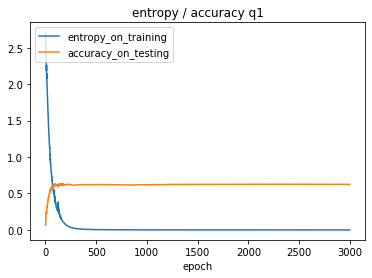

In [19]:
# 3000 epoch, 467 mins

entropy_on_training = np.load(os.path.join('other', 'npy', 'entropy_on_training_q1.npy'), allow_pickle=True)
accuracy_on_testing = np.load(os.path.join('other', 'npy', 'accuracy_on_testing_q1.npy'), allow_pickle=True)

#plot
plt.figure()
plt.plot(entropy_on_training)
plt.plot(accuracy_on_testing)
plt.title('entropy / accuracy q1')
plt.xlabel('epoch')
plt.legend(['entropy_on_training', 'accuracy_on_testing',], loc='upper left')
plt.savefig(os.path.join('other', 'figure', 'q1.png'))

## Q2 CNN on embedding layer of cnn index

In [20]:
MAX_DOCUMENT_LENGTH = 100
EMBEDDING_SIZE = 20
N_FILTERS = 10
FILTER_SHAPE1 = [20, 20]
FILTER_SHAPE2 = [20, 1]
POOLING_WINDOW = 4
POOLING_STRIDE = 2
MAX_LABEL = 15

no_epochs = 3000
lr = 0.01

tf.reset_default_graph()

def char_cnn_model(x):
  
    input_layer = tf.reshape(
      tf.one_hot(x, 256), [-1, MAX_DOCUMENT_LENGTH, 256])
    
    with tf.variable_scope('Embedding_Layer'):
        W1 = tf.Variable(tf.truncated_normal([256, EMBEDDING_SIZE], stddev=2.0/np.sqrt(256)))
        b1 = tf.Variable(tf.zeros([EMBEDDING_SIZE]))
        embedding = tf.nn.relu(tf.matmul(input_layer, W1) + b1)
        embedding = tf.reshape(embedding, [-1, MAX_DOCUMENT_LENGTH, EMBEDDING_SIZE, 1])

    with tf.variable_scope('CNN_Layer1'):
        conv1 = tf.layers.conv2d(
            embedding,
            filters=N_FILTERS,
            kernel_size=FILTER_SHAPE1,
            padding='VALID',
            activation=tf.nn.relu)
        pool1 = tf.layers.max_pooling2d(
            conv1,
            pool_size=POOLING_WINDOW,
            strides=POOLING_STRIDE,
            padding='SAME')
        
    with tf.variable_scope('CNN_Layer2'):
        conv2 = tf.layers.conv2d(
            pool1,
            filters=N_FILTERS,
            kernel_size=FILTER_SHAPE2,
            padding='VALID',
            activation=tf.nn.relu)
        pool2 = tf.layers.max_pooling2d(
            conv2,
            pool_size=POOLING_WINDOW,
            strides=POOLING_STRIDE,
            padding='SAME')

    dim = pool2.get_shape()[1].value * pool2.get_shape()[2].value * pool2.get_shape()[3].value 
    
    with tf.variable_scope('CNN_Flatten'):
        flatten = tf.reshape(pool2, [-1, dim])
    
    with tf.variable_scope('ANN'):
        W1 = tf.Variable(tf.truncated_normal([dim, MAX_LABEL], stddev=1.0/np.sqrt(dim)))
        b1 = tf.Variable(tf.zeros([MAX_LABEL]))
        logits = tf.matmul(flatten, W1) + b1


    return input_layer, embedding, conv1, pool1, conv2, pool2, flatten, logits

# Create the model
x = tf.placeholder(tf.int64, [None, MAX_DOCUMENT_LENGTH])
y_ = tf.placeholder(tf.int64)

inputs, embedding, conv1, pool1, conv2, pool2, flatten, logits = char_cnn_model(x)

# Optimizer
entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=tf.one_hot(y_, MAX_LABEL), logits=logits))
train_op = tf.train.AdamOptimizer(lr).minimize(entropy)


sess = tf.Session()
sess.run(tf.global_variables_initializer())


print('input: ', sess.run([tf.shape(inputs)], {x: x_train, y_: y_train}))
print('embedding: ', sess.run([tf.shape(embedding)], {x: x_train, y_: y_train}))
print('conv1: ', sess.run([tf.shape(conv1)], {x: x_train, y_: y_train}))
print('pool1: ', sess.run([tf.shape(pool1)], {x: x_train, y_: y_train}))
print('conv2: ', sess.run([tf.shape(conv2)], {x: x_train, y_: y_train}))
print('pool2: ', sess.run([tf.shape(pool2)], {x: x_train, y_: y_train}))
print('flatten: ', sess.run([tf.shape(flatten)], {x: x_train, y_: y_train}))
print('logits: ', sess.run([tf.shape(logits)], {x: x_train, y_: y_train}))

entropy_on_training = []
accuracy_on_testing = []

timeRecoder = TimeRecoder()
timeRecoder.start()

for e in range(no_epochs):
    
    # training
    _, loss_  = sess.run([train_op, entropy], {x: x_train, y_: y_train})
    entropy_on_training.append(loss_)
    
    # testing
    predict = sess.run([logits], {x: x_test})
    accuracy_on_testing.append(accuracy_score(list(y_test), list(np.argmax(np.array(predict[0]), axis=1))))
    
     
    print('epoch %d: entropy: %f, accuracy: %f' % (e, entropy_on_training[-1], accuracy_on_testing[-1]))
    
timeRecoder.end()

np.save(os.path.join('other', 'npy', 'entropy_on_training_q2.npy'), np.array(entropy_on_training))
np.save(os.path.join('other', 'npy', 'accuracy_on_testing_q2.npy'), np.array(accuracy_on_testing))

input:  [array([5600,  100,  256], dtype=int32)]
embedding:  [array([5600,  100,   20,    1], dtype=int32)]
conv1:  [array([5600,   81,    1,   10], dtype=int32)]
pool1:  [array([5600,   41,    1,   10], dtype=int32)]
conv2:  [array([5600,   22,    1,   10], dtype=int32)]
pool2:  [array([5600,   11,    1,   10], dtype=int32)]
flatten:  [array([5600,  110], dtype=int32)]
logits:  [array([5600,   15], dtype=int32)]


 ----------  START  ---------- 2019-11-14 08:05:07.636766 


epoch 0: entropy: 2.706766, accuracy: 0.071429
epoch 1: entropy: 2.684850, accuracy: 0.064286
epoch 2: entropy: 2.656900, accuracy: 0.071429
epoch 3: entropy: 2.677822, accuracy: 0.070000
epoch 4: entropy: 2.657766, accuracy: 0.072857
epoch 5: entropy: 2.655265, accuracy: 0.074286
epoch 6: entropy: 2.646151, accuracy: 0.082857
epoch 7: entropy: 2.643179, accuracy: 0.084286
epoch 8: entropy: 2.638749, accuracy: 0.091429
epoch 9: entropy: 2.633867, accuracy: 0.088571
epoch 10: entropy: 2.629570, accuracy: 0.104286
ep

epoch 160: entropy: 0.918941, accuracy: 0.585714
epoch 161: entropy: 0.914532, accuracy: 0.594286
epoch 162: entropy: 0.897936, accuracy: 0.584286
epoch 163: entropy: 0.895737, accuracy: 0.585714
epoch 164: entropy: 0.894287, accuracy: 0.590000
epoch 165: entropy: 0.880307, accuracy: 0.590000
epoch 166: entropy: 0.876521, accuracy: 0.585714
epoch 167: entropy: 0.875414, accuracy: 0.591429
epoch 168: entropy: 0.863407, accuracy: 0.587143
epoch 169: entropy: 0.861555, accuracy: 0.594286
epoch 170: entropy: 0.850592, accuracy: 0.582857
epoch 171: entropy: 0.849302, accuracy: 0.594286
epoch 172: entropy: 0.842095, accuracy: 0.591429
epoch 173: entropy: 0.836550, accuracy: 0.590000
epoch 174: entropy: 0.832316, accuracy: 0.595714
epoch 175: entropy: 0.826166, accuracy: 0.594286
epoch 176: entropy: 0.821156, accuracy: 0.592857
epoch 177: entropy: 0.816574, accuracy: 0.605714
epoch 178: entropy: 0.811485, accuracy: 0.592857
epoch 179: entropy: 0.805064, accuracy: 0.594286
epoch 180: entropy: 

epoch 328: entropy: 0.441660, accuracy: 0.571429
epoch 329: entropy: 0.441241, accuracy: 0.570000
epoch 330: entropy: 0.439741, accuracy: 0.567143
epoch 331: entropy: 0.436235, accuracy: 0.568571
epoch 332: entropy: 0.433762, accuracy: 0.565714
epoch 333: entropy: 0.432388, accuracy: 0.572857
epoch 334: entropy: 0.430218, accuracy: 0.574286
epoch 335: entropy: 0.427431, accuracy: 0.565714
epoch 336: entropy: 0.425718, accuracy: 0.572857
epoch 337: entropy: 0.424323, accuracy: 0.567143
epoch 338: entropy: 0.421710, accuracy: 0.571429
epoch 339: entropy: 0.419046, accuracy: 0.570000
epoch 340: entropy: 0.418153, accuracy: 0.568571
epoch 341: entropy: 0.418543, accuracy: 0.571429
epoch 342: entropy: 0.417000, accuracy: 0.574286
epoch 343: entropy: 0.416928, accuracy: 0.568571
epoch 344: entropy: 0.417068, accuracy: 0.571429
epoch 345: entropy: 0.422708, accuracy: 0.572857
epoch 346: entropy: 0.426413, accuracy: 0.575714
epoch 347: entropy: 0.436125, accuracy: 0.564286
epoch 348: entropy: 

epoch 496: entropy: 0.266456, accuracy: 0.560000
epoch 497: entropy: 0.265706, accuracy: 0.561429
epoch 498: entropy: 0.265247, accuracy: 0.564286
epoch 499: entropy: 0.265532, accuracy: 0.560000
epoch 500: entropy: 0.263875, accuracy: 0.561429
epoch 501: entropy: 0.261898, accuracy: 0.562857
epoch 502: entropy: 0.259790, accuracy: 0.558571
epoch 503: entropy: 0.258871, accuracy: 0.562857
epoch 504: entropy: 0.258607, accuracy: 0.560000
epoch 505: entropy: 0.257326, accuracy: 0.567143
epoch 506: entropy: 0.256060, accuracy: 0.560000
epoch 507: entropy: 0.254519, accuracy: 0.561429
epoch 508: entropy: 0.252903, accuracy: 0.562857
epoch 509: entropy: 0.251666, accuracy: 0.562857
epoch 510: entropy: 0.251038, accuracy: 0.565714
epoch 511: entropy: 0.250640, accuracy: 0.561429
epoch 512: entropy: 0.249625, accuracy: 0.564286
epoch 513: entropy: 0.248360, accuracy: 0.562857
epoch 514: entropy: 0.246568, accuracy: 0.562857
epoch 515: entropy: 0.245109, accuracy: 0.567143
epoch 516: entropy: 

epoch 664: entropy: 0.221612, accuracy: 0.571429
epoch 665: entropy: 0.218991, accuracy: 0.570000
epoch 666: entropy: 0.216532, accuracy: 0.570000
epoch 667: entropy: 0.213912, accuracy: 0.568571
epoch 668: entropy: 0.211738, accuracy: 0.568571
epoch 669: entropy: 0.209215, accuracy: 0.568571
epoch 670: entropy: 0.207374, accuracy: 0.565714
epoch 671: entropy: 0.205427, accuracy: 0.568571
epoch 672: entropy: 0.202840, accuracy: 0.568571
epoch 673: entropy: 0.200763, accuracy: 0.568571
epoch 674: entropy: 0.197461, accuracy: 0.568571
epoch 675: entropy: 0.195712, accuracy: 0.568571
epoch 676: entropy: 0.193846, accuracy: 0.567143
epoch 677: entropy: 0.191761, accuracy: 0.570000
epoch 678: entropy: 0.190079, accuracy: 0.567143
epoch 679: entropy: 0.187216, accuracy: 0.567143
epoch 680: entropy: 0.185462, accuracy: 0.568571
epoch 681: entropy: 0.183433, accuracy: 0.567143
epoch 682: entropy: 0.181645, accuracy: 0.565714
epoch 683: entropy: 0.180471, accuracy: 0.565714
epoch 684: entropy: 

epoch 832: entropy: 0.041698, accuracy: 0.552857
epoch 833: entropy: 0.041501, accuracy: 0.555714
epoch 834: entropy: 0.041100, accuracy: 0.552857
epoch 835: entropy: 0.040804, accuracy: 0.554286
epoch 836: entropy: 0.039846, accuracy: 0.554286
epoch 837: entropy: 0.039759, accuracy: 0.552857
epoch 838: entropy: 0.039814, accuracy: 0.552857
epoch 839: entropy: 0.039376, accuracy: 0.555714
epoch 840: entropy: 0.038348, accuracy: 0.554286
epoch 841: entropy: 0.038800, accuracy: 0.555714
epoch 842: entropy: 0.038233, accuracy: 0.550000
epoch 843: entropy: 0.037870, accuracy: 0.554286
epoch 844: entropy: 0.037132, accuracy: 0.552857
epoch 845: entropy: 0.037338, accuracy: 0.551429
epoch 846: entropy: 0.037264, accuracy: 0.554286
epoch 847: entropy: 0.036331, accuracy: 0.552857
epoch 848: entropy: 0.036067, accuracy: 0.551429
epoch 849: entropy: 0.036373, accuracy: 0.551429
epoch 850: entropy: 0.035559, accuracy: 0.554286
epoch 851: entropy: 0.034982, accuracy: 0.551429
epoch 852: entropy: 

epoch 1000: entropy: 0.012981, accuracy: 0.548571
epoch 1001: entropy: 0.012733, accuracy: 0.545714
epoch 1002: entropy: 0.012833, accuracy: 0.545714
epoch 1003: entropy: 0.012464, accuracy: 0.547143
epoch 1004: entropy: 0.012571, accuracy: 0.545714
epoch 1005: entropy: 0.012338, accuracy: 0.542857
epoch 1006: entropy: 0.012432, accuracy: 0.545714
epoch 1007: entropy: 0.012184, accuracy: 0.548571
epoch 1008: entropy: 0.012242, accuracy: 0.547143
epoch 1009: entropy: 0.012049, accuracy: 0.547143
epoch 1010: entropy: 0.012045, accuracy: 0.545714
epoch 1011: entropy: 0.011976, accuracy: 0.544286
epoch 1012: entropy: 0.011831, accuracy: 0.544286
epoch 1013: entropy: 0.011868, accuracy: 0.545714
epoch 1014: entropy: 0.011668, accuracy: 0.544286
epoch 1015: entropy: 0.011718, accuracy: 0.545714
epoch 1016: entropy: 0.011549, accuracy: 0.544286
epoch 1017: entropy: 0.011554, accuracy: 0.544286
epoch 1018: entropy: 0.011453, accuracy: 0.545714
epoch 1019: entropy: 0.011399, accuracy: 0.547143


epoch 1164: entropy: 0.006004, accuracy: 0.547143
epoch 1165: entropy: 0.005982, accuracy: 0.547143
epoch 1166: entropy: 0.005958, accuracy: 0.547143
epoch 1167: entropy: 0.005937, accuracy: 0.547143
epoch 1168: entropy: 0.005915, accuracy: 0.547143
epoch 1169: entropy: 0.005892, accuracy: 0.547143
epoch 1170: entropy: 0.005873, accuracy: 0.547143
epoch 1171: entropy: 0.005849, accuracy: 0.547143
epoch 1172: entropy: 0.005827, accuracy: 0.547143
epoch 1173: entropy: 0.005807, accuracy: 0.547143
epoch 1174: entropy: 0.005783, accuracy: 0.547143
epoch 1175: entropy: 0.005764, accuracy: 0.547143
epoch 1176: entropy: 0.005741, accuracy: 0.547143
epoch 1177: entropy: 0.005722, accuracy: 0.547143
epoch 1178: entropy: 0.005702, accuracy: 0.547143
epoch 1179: entropy: 0.005680, accuracy: 0.547143
epoch 1180: entropy: 0.005660, accuracy: 0.547143
epoch 1181: entropy: 0.005638, accuracy: 0.547143
epoch 1182: entropy: 0.005620, accuracy: 0.547143
epoch 1183: entropy: 0.005596, accuracy: 0.547143


epoch 1328: entropy: 0.003509, accuracy: 0.550000
epoch 1329: entropy: 0.003500, accuracy: 0.550000
epoch 1330: entropy: 0.003490, accuracy: 0.550000
epoch 1331: entropy: 0.003479, accuracy: 0.550000
epoch 1332: entropy: 0.003470, accuracy: 0.550000
epoch 1333: entropy: 0.003460, accuracy: 0.548571
epoch 1334: entropy: 0.003450, accuracy: 0.550000
epoch 1335: entropy: 0.003440, accuracy: 0.550000
epoch 1336: entropy: 0.003430, accuracy: 0.548571
epoch 1337: entropy: 0.003421, accuracy: 0.550000
epoch 1338: entropy: 0.003440, accuracy: 0.550000
epoch 1339: entropy: 0.003404, accuracy: 0.550000
epoch 1340: entropy: 0.003393, accuracy: 0.548571
epoch 1341: entropy: 0.003384, accuracy: 0.548571
epoch 1342: entropy: 0.003374, accuracy: 0.548571
epoch 1343: entropy: 0.003365, accuracy: 0.548571
epoch 1344: entropy: 0.003355, accuracy: 0.548571
epoch 1345: entropy: 0.003345, accuracy: 0.548571
epoch 1346: entropy: 0.003336, accuracy: 0.550000
epoch 1347: entropy: 0.003327, accuracy: 0.550000


epoch 1492: entropy: 0.002290, accuracy: 0.551429
epoch 1493: entropy: 0.002285, accuracy: 0.551429
epoch 1494: entropy: 0.002280, accuracy: 0.551429
epoch 1495: entropy: 0.002275, accuracy: 0.551429
epoch 1496: entropy: 0.002270, accuracy: 0.551429
epoch 1497: entropy: 0.002264, accuracy: 0.551429
epoch 1498: entropy: 0.002259, accuracy: 0.551429
epoch 1499: entropy: 0.002253, accuracy: 0.551429
epoch 1500: entropy: 0.002248, accuracy: 0.551429
epoch 1501: entropy: 0.002243, accuracy: 0.551429
epoch 1502: entropy: 0.002238, accuracy: 0.551429
epoch 1503: entropy: 0.002232, accuracy: 0.551429
epoch 1504: entropy: 0.002227, accuracy: 0.551429
epoch 1505: entropy: 0.002222, accuracy: 0.551429
epoch 1506: entropy: 0.002217, accuracy: 0.550000
epoch 1507: entropy: 0.002212, accuracy: 0.550000
epoch 1508: entropy: 0.002207, accuracy: 0.550000
epoch 1509: entropy: 0.002202, accuracy: 0.551429
epoch 1510: entropy: 0.002197, accuracy: 0.551429
epoch 1511: entropy: 0.002192, accuracy: 0.550000


epoch 1656: entropy: 0.001607, accuracy: 0.548571
epoch 1657: entropy: 0.001604, accuracy: 0.548571
epoch 1658: entropy: 0.001600, accuracy: 0.548571
epoch 1659: entropy: 0.001597, accuracy: 0.548571
epoch 1660: entropy: 0.001594, accuracy: 0.548571
epoch 1661: entropy: 0.001591, accuracy: 0.548571
epoch 1662: entropy: 0.001588, accuracy: 0.548571
epoch 1663: entropy: 0.001584, accuracy: 0.548571
epoch 1664: entropy: 0.001581, accuracy: 0.548571
epoch 1665: entropy: 0.001578, accuracy: 0.548571
epoch 1666: entropy: 0.001575, accuracy: 0.548571
epoch 1667: entropy: 0.001572, accuracy: 0.548571
epoch 1668: entropy: 0.001569, accuracy: 0.548571
epoch 1669: entropy: 0.001566, accuracy: 0.548571
epoch 1670: entropy: 0.001570, accuracy: 0.548571
epoch 1671: entropy: 0.001560, accuracy: 0.548571
epoch 1672: entropy: 0.001557, accuracy: 0.548571
epoch 1673: entropy: 0.001554, accuracy: 0.548571
epoch 1674: entropy: 0.001551, accuracy: 0.548571
epoch 1675: entropy: 0.001547, accuracy: 0.548571


epoch 1820: entropy: 0.001186, accuracy: 0.547143
epoch 1821: entropy: 0.001184, accuracy: 0.547143
epoch 1822: entropy: 0.001182, accuracy: 0.547143
epoch 1823: entropy: 0.001180, accuracy: 0.547143
epoch 1824: entropy: 0.001178, accuracy: 0.547143
epoch 1825: entropy: 0.001176, accuracy: 0.547143
epoch 1826: entropy: 0.001174, accuracy: 0.547143
epoch 1827: entropy: 0.001172, accuracy: 0.547143
epoch 1828: entropy: 0.001170, accuracy: 0.547143
epoch 1829: entropy: 0.001168, accuracy: 0.547143
epoch 1830: entropy: 0.001166, accuracy: 0.547143
epoch 1831: entropy: 0.001164, accuracy: 0.547143
epoch 1832: entropy: 0.001162, accuracy: 0.547143
epoch 1833: entropy: 0.001160, accuracy: 0.547143
epoch 1834: entropy: 0.001158, accuracy: 0.547143
epoch 1835: entropy: 0.001156, accuracy: 0.547143
epoch 1836: entropy: 0.001154, accuracy: 0.547143
epoch 1837: entropy: 0.001152, accuracy: 0.547143
epoch 1838: entropy: 0.001150, accuracy: 0.547143
epoch 1839: entropy: 0.001148, accuracy: 0.547143


epoch 1984: entropy: 0.000907, accuracy: 0.548571
epoch 1985: entropy: 0.000906, accuracy: 0.548571
epoch 1986: entropy: 0.000905, accuracy: 0.548571
epoch 1987: entropy: 0.000903, accuracy: 0.548571
epoch 1988: entropy: 0.000902, accuracy: 0.548571
epoch 1989: entropy: 0.000900, accuracy: 0.548571
epoch 1990: entropy: 0.000899, accuracy: 0.548571
epoch 1991: entropy: 0.000898, accuracy: 0.548571
epoch 1992: entropy: 0.000896, accuracy: 0.548571
epoch 1993: entropy: 0.000895, accuracy: 0.548571
epoch 1994: entropy: 0.000894, accuracy: 0.548571
epoch 1995: entropy: 0.000892, accuracy: 0.548571
epoch 1996: entropy: 0.000891, accuracy: 0.548571
epoch 1997: entropy: 0.000889, accuracy: 0.548571
epoch 1998: entropy: 0.000888, accuracy: 0.548571
epoch 1999: entropy: 0.000898, accuracy: 0.548571
epoch 2000: entropy: 0.000886, accuracy: 0.548571
epoch 2001: entropy: 0.000885, accuracy: 0.548571
epoch 2002: entropy: 0.000883, accuracy: 0.548571
epoch 2003: entropy: 0.000882, accuracy: 0.548571


epoch 2148: entropy: 0.000713, accuracy: 0.545714
epoch 2149: entropy: 0.000712, accuracy: 0.545714
epoch 2150: entropy: 0.000711, accuracy: 0.545714
epoch 2151: entropy: 0.000710, accuracy: 0.545714
epoch 2152: entropy: 0.000709, accuracy: 0.545714
epoch 2153: entropy: 0.000708, accuracy: 0.545714
epoch 2154: entropy: 0.000707, accuracy: 0.545714
epoch 2155: entropy: 0.000706, accuracy: 0.545714
epoch 2156: entropy: 0.000705, accuracy: 0.545714
epoch 2157: entropy: 0.000704, accuracy: 0.545714
epoch 2158: entropy: 0.000703, accuracy: 0.545714
epoch 2159: entropy: 0.000702, accuracy: 0.545714
epoch 2160: entropy: 0.000701, accuracy: 0.545714
epoch 2161: entropy: 0.000700, accuracy: 0.545714
epoch 2162: entropy: 0.000699, accuracy: 0.545714
epoch 2163: entropy: 0.000698, accuracy: 0.545714
epoch 2164: entropy: 0.000697, accuracy: 0.545714
epoch 2165: entropy: 0.000696, accuracy: 0.545714
epoch 2166: entropy: 0.000695, accuracy: 0.545714
epoch 2167: entropy: 0.000694, accuracy: 0.545714


epoch 2312: entropy: 0.000570, accuracy: 0.545714
epoch 2313: entropy: 0.000569, accuracy: 0.545714
epoch 2314: entropy: 0.000569, accuracy: 0.545714
epoch 2315: entropy: 0.000568, accuracy: 0.545714
epoch 2316: entropy: 0.000567, accuracy: 0.545714
epoch 2317: entropy: 0.000566, accuracy: 0.545714
epoch 2318: entropy: 0.000566, accuracy: 0.545714
epoch 2319: entropy: 0.000565, accuracy: 0.545714
epoch 2320: entropy: 0.000564, accuracy: 0.547143
epoch 2321: entropy: 0.000563, accuracy: 0.547143
epoch 2322: entropy: 0.000563, accuracy: 0.545714
epoch 2323: entropy: 0.000562, accuracy: 0.547143
epoch 2324: entropy: 0.000561, accuracy: 0.547143
epoch 2325: entropy: 0.000561, accuracy: 0.545714
epoch 2326: entropy: 0.000560, accuracy: 0.545714
epoch 2327: entropy: 0.000559, accuracy: 0.547143
epoch 2328: entropy: 0.000558, accuracy: 0.547143
epoch 2329: entropy: 0.000558, accuracy: 0.545714
epoch 2330: entropy: 0.000557, accuracy: 0.545714
epoch 2331: entropy: 0.000556, accuracy: 0.547143


epoch 2476: entropy: 0.000464, accuracy: 0.547143
epoch 2477: entropy: 0.000464, accuracy: 0.545714
epoch 2478: entropy: 0.000463, accuracy: 0.547143
epoch 2479: entropy: 0.000463, accuracy: 0.547143
epoch 2480: entropy: 0.000462, accuracy: 0.547143
epoch 2481: entropy: 0.000462, accuracy: 0.545714
epoch 2482: entropy: 0.000461, accuracy: 0.547143
epoch 2483: entropy: 0.000461, accuracy: 0.547143
epoch 2484: entropy: 0.000460, accuracy: 0.545714
epoch 2485: entropy: 0.000459, accuracy: 0.545714
epoch 2486: entropy: 0.000459, accuracy: 0.547143
epoch 2487: entropy: 0.000458, accuracy: 0.547143
epoch 2488: entropy: 0.000458, accuracy: 0.545714
epoch 2489: entropy: 0.000457, accuracy: 0.545714
epoch 2490: entropy: 0.000457, accuracy: 0.547143
epoch 2491: entropy: 0.000456, accuracy: 0.547143
epoch 2492: entropy: 0.000456, accuracy: 0.545714
epoch 2493: entropy: 0.000455, accuracy: 0.545714
epoch 2494: entropy: 0.000455, accuracy: 0.547143
epoch 2495: entropy: 0.000454, accuracy: 0.547143


epoch 2640: entropy: 0.000384, accuracy: 0.547143
epoch 2641: entropy: 0.000384, accuracy: 0.547143
epoch 2642: entropy: 0.000383, accuracy: 0.547143
epoch 2643: entropy: 0.000383, accuracy: 0.547143
epoch 2644: entropy: 0.000383, accuracy: 0.547143
epoch 2645: entropy: 0.000382, accuracy: 0.547143
epoch 2646: entropy: 0.000382, accuracy: 0.547143
epoch 2647: entropy: 0.000381, accuracy: 0.547143
epoch 2648: entropy: 0.000381, accuracy: 0.547143
epoch 2649: entropy: 0.000380, accuracy: 0.547143
epoch 2650: entropy: 0.000380, accuracy: 0.547143
epoch 2651: entropy: 0.000380, accuracy: 0.547143
epoch 2652: entropy: 0.000379, accuracy: 0.547143
epoch 2653: entropy: 0.000379, accuracy: 0.547143
epoch 2654: entropy: 0.000378, accuracy: 0.547143
epoch 2655: entropy: 0.000378, accuracy: 0.547143
epoch 2656: entropy: 0.000378, accuracy: 0.547143
epoch 2657: entropy: 0.000377, accuracy: 0.547143
epoch 2658: entropy: 0.000377, accuracy: 0.547143
epoch 2659: entropy: 0.000376, accuracy: 0.547143


epoch 2804: entropy: 0.000321, accuracy: 0.548571
epoch 2805: entropy: 0.000321, accuracy: 0.548571
epoch 2806: entropy: 0.000321, accuracy: 0.548571
epoch 2807: entropy: 0.000320, accuracy: 0.548571
epoch 2808: entropy: 0.000320, accuracy: 0.548571
epoch 2809: entropy: 0.000320, accuracy: 0.548571
epoch 2810: entropy: 0.000319, accuracy: 0.548571
epoch 2811: entropy: 0.000319, accuracy: 0.548571
epoch 2812: entropy: 0.000319, accuracy: 0.548571
epoch 2813: entropy: 0.000318, accuracy: 0.548571
epoch 2814: entropy: 0.000318, accuracy: 0.548571
epoch 2815: entropy: 0.000318, accuracy: 0.548571
epoch 2816: entropy: 0.000317, accuracy: 0.548571
epoch 2817: entropy: 0.000317, accuracy: 0.548571
epoch 2818: entropy: 0.000317, accuracy: 0.548571
epoch 2819: entropy: 0.000316, accuracy: 0.548571
epoch 2820: entropy: 0.000316, accuracy: 0.548571
epoch 2821: entropy: 0.000316, accuracy: 0.548571
epoch 2822: entropy: 0.000315, accuracy: 0.548571
epoch 2823: entropy: 0.000315, accuracy: 0.548571


epoch 2968: entropy: 0.000271, accuracy: 0.548571
epoch 2969: entropy: 0.000271, accuracy: 0.548571
epoch 2970: entropy: 0.000271, accuracy: 0.548571
epoch 2971: entropy: 0.000270, accuracy: 0.548571
epoch 2972: entropy: 0.000270, accuracy: 0.548571
epoch 2973: entropy: 0.000270, accuracy: 0.548571
epoch 2974: entropy: 0.000270, accuracy: 0.548571
epoch 2975: entropy: 0.000269, accuracy: 0.548571
epoch 2976: entropy: 0.000269, accuracy: 0.548571
epoch 2977: entropy: 0.000269, accuracy: 0.548571
epoch 2978: entropy: 0.000269, accuracy: 0.548571
epoch 2979: entropy: 0.000268, accuracy: 0.548571
epoch 2980: entropy: 0.000268, accuracy: 0.548571
epoch 2981: entropy: 0.000268, accuracy: 0.548571
epoch 2982: entropy: 0.000267, accuracy: 0.548571
epoch 2983: entropy: 0.000267, accuracy: 0.547143
epoch 2984: entropy: 0.000267, accuracy: 0.547143
epoch 2985: entropy: 0.000267, accuracy: 0.547143
epoch 2986: entropy: 0.000266, accuracy: 0.547143
epoch 2987: entropy: 0.000266, accuracy: 0.547143


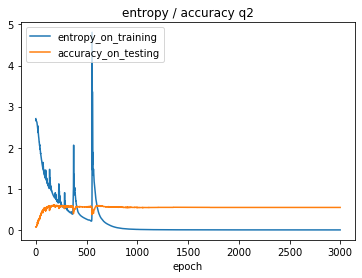

In [21]:
entropy_on_training = np.load(os.path.join('other', 'npy', 'entropy_on_training_q2.npy'), allow_pickle=True)
accuracy_on_testing = np.load(os.path.join('other', 'npy', 'accuracy_on_testing_q2.npy'), allow_pickle=True)

#plot
plt.figure()
plt.plot(entropy_on_training)
plt.plot(accuracy_on_testing)
plt.title('entropy / accuracy q2')
plt.xlabel('epoch')
plt.legend(['entropy_on_training', 'accuracy_on_testing',], loc='upper left')
plt.savefig(os.path.join('other', 'figure', 'q2.png'))

## Load Data For Q3

In [13]:
x_train = np.load(os.path.join('other', 'npy', 'x_train_rnn.npy'), allow_pickle=True)
x_test = np.load(os.path.join('other', 'npy', 'x_test_rnn.npy'), allow_pickle=True)
y_train = np.load(os.path.join('other', 'npy', 'y_train_rnn.npy'), allow_pickle=True)
y_test = np.load(os.path.join('other', 'npy', 'y_test_rnn.npy'), allow_pickle=True)

## Q3 GRU on rnn index

In [34]:
MAX_DOCUMENT_LENGTH = 100
HIDDEN_SIZE = 20
MAX_LABEL = 15
EMBEDDING_SIZE = 50

no_epochs = 3000
lr = 0.01

tf.reset_default_graph()

def rnn_model(x):
    
    global no_words

    word_vectors = tf.contrib.layers.embed_sequence(
        x, vocab_size=no_words, embed_dim=EMBEDDING_SIZE)

    word_list = tf.unstack(word_vectors, axis=1)

    cell = tf.nn.rnn_cell.GRUCell(HIDDEN_SIZE)
    _, encoding = tf.nn.static_rnn(cell, word_list, dtype=tf.float32)

    logits = tf.layers.dense(encoding, MAX_LABEL, activation=None)

    return word_vectors, word_list, encoding, logits


# Create the model
x = tf.placeholder(tf.int64, [None, MAX_DOCUMENT_LENGTH])
y_ = tf.placeholder(tf.int64)

word_vectors, word_list, encoding, logits = rnn_model(x)

# Optimizer
entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=tf.one_hot(y_, MAX_LABEL), logits=logits))
train_op = tf.train.AdamOptimizer(lr).minimize(entropy)


sess = tf.Session()
sess.run(tf.global_variables_initializer())


print('word_vectors: ', sess.run([tf.shape(word_vectors)], {x: x_train, y_: y_train}))
print('word_list: ', sess.run([tf.shape(word_list)], {x: x_train, y_: y_train}))
print('encoding: ', sess.run([tf.shape(encoding)], {x: x_train, y_: y_train}))
print('logits: ', sess.run([tf.shape(logits)], {x: x_train, y_: y_train}))


entropy_on_training = []
accuracy_on_testing = []

timeRecoder = TimeRecoder()
timeRecoder.start()

for e in range(no_epochs):
    
    # training
    _, loss_  = sess.run([train_op, entropy], {x: x_train, y_: y_train})
    entropy_on_training.append(loss_)
    
    # testing
    predict = sess.run([logits], {x: x_test})
    accuracy_on_testing.append(accuracy_score(list(y_test), list(np.argmax(np.array(predict[0]), axis=1))))
    
     
    print('epoch %d: entropy: %f, accuracy: %f' % (e, entropy_on_training[-1], accuracy_on_testing[-1]))
    
timeRecoder.end()

np.save(os.path.join('other', 'npy', 'entropy_on_training_q3.npy'), np.array(entropy_on_training))
np.save(os.path.join('other', 'npy', 'accuracy_on_testing_q3.npy'), np.array(accuracy_on_testing))

word_vectors:  [array([5600,  100,   50], dtype=int32)]
word_list:  [array([ 100, 5600,   50], dtype=int32)]
encoding:  [array([5600,   20], dtype=int32)]
logits:  [array([5600,   15], dtype=int32)]


 ----------  START  ---------- 2019-11-14 18:44:46.038811 


epoch 0: entropy: 2.707996, accuracy: 0.071429
epoch 1: entropy: 2.698211, accuracy: 0.071429
epoch 2: entropy: 2.689038, accuracy: 0.071429
epoch 3: entropy: 2.679222, accuracy: 0.071429
epoch 4: entropy: 2.668201, accuracy: 0.071429
epoch 5: entropy: 2.658704, accuracy: 0.071429
epoch 6: entropy: 2.651819, accuracy: 0.071429
epoch 7: entropy: 2.645310, accuracy: 0.071429
epoch 8: entropy: 2.642159, accuracy: 0.071429
epoch 9: entropy: 2.643154, accuracy: 0.071429
epoch 10: entropy: 2.643726, accuracy: 0.071429
epoch 11: entropy: 2.641728, accuracy: 0.071429
epoch 12: entropy: 2.639942, accuracy: 0.071429
epoch 13: entropy: 2.640180, accuracy: 0.071429
epoch 14: entropy: 2.640883, accuracy: 0.071429
epoch 15: entropy: 2.640787,

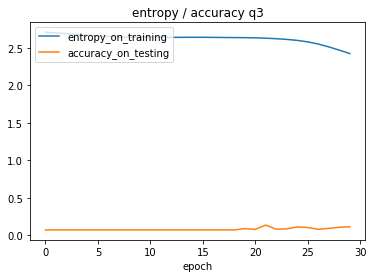

In [35]:
entropy_on_training = np.load(os.path.join('other', 'npy', 'entropy_on_training_q3.npy'), allow_pickle=True)
accuracy_on_testing = np.load(os.path.join('other', 'npy', 'accuracy_on_testing_q3.npy'), allow_pickle=True)

#plot
plt.figure()
plt.plot(entropy_on_training)
plt.plot(accuracy_on_testing)
plt.title('entropy / accuracy q3')
plt.xlabel('epoch')
plt.legend(['entropy_on_training', 'accuracy_on_testing',], loc='upper left')
plt.savefig(os.path.join('other', 'figure', 'q3.png'))

## Q4

In [39]:
MAX_DOCUMENT_LENGTH = 100
HIDDEN_SIZE = 20
MAX_LABEL = 15
EMBEDDING_SIZE = 20

no_epochs = 3000
lr = 0.01

tf.reset_default_graph()

def rnn_model(x):
    
    global no_words

    word_vectors = tf.contrib.layers.embed_sequence(
        x, vocab_size=no_words, embed_dim=EMBEDDING_SIZE)

    word_list = tf.unstack(word_vectors, axis=1)

    cell = tf.nn.rnn_cell.GRUCell(HIDDEN_SIZE)
    _, encoding = tf.nn.static_rnn(cell, word_list, dtype=tf.float32)

    logits = tf.layers.dense(encoding, MAX_LABEL, activation=None)
    dropout = tf.layers.dropout(logits)

    return word_vectors, word_list, encoding, dropout


# Create the model
x = tf.placeholder(tf.int64, [None, MAX_DOCUMENT_LENGTH])
y_ = tf.placeholder(tf.int64)

word_vectors, word_list, encoding, logits = rnn_model(x)

# Optimizer
entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=tf.one_hot(y_, MAX_LABEL), logits=logits))
train_op = tf.train.AdamOptimizer(lr).minimize(entropy)


sess = tf.Session()
sess.run(tf.global_variables_initializer())


print('word_vectors: ', sess.run([tf.shape(word_vectors)], {x: x_train, y_: y_train}))
print('word_list: ', sess.run([tf.shape(word_list)], {x: x_train, y_: y_train}))
print('encoding: ', sess.run([tf.shape(encoding)], {x: x_train, y_: y_train}))
print('logits: ', sess.run([tf.shape(logits)], {x: x_train, y_: y_train}))


entropy_on_training = []
accuracy_on_testing = []

timeRecoder = TimeRecoder()
timeRecoder.start()

for e in range(no_epochs):
    
    # training
    _, loss_  = sess.run([train_op, entropy], {x: x_train, y_: y_train})
    entropy_on_training.append(loss_)
    
    # testing
    predict = sess.run([logits], {x: x_test})
    accuracy_on_testing.append(accuracy_score(list(y_test), list(np.argmax(np.array(predict[0]), axis=1))))
    
     
    print('epoch %d: entropy: %f, accuracy: %f' % (e, entropy_on_training[-1], accuracy_on_testing[-1]))
    
timeRecoder.end()

np.save(os.path.join('other', 'npy', 'entropy_on_training_q4.npy'), np.array(entropy_on_training))
np.save(os.path.join('other', 'npy', 'accuracy_on_testing_q4.npy'), np.array(accuracy_on_testing))

Instructions for updating:
Use keras.layers.dropout instead.
word_vectors:  [array([5600,  100,   20], dtype=int32)]
word_list:  [array([ 100, 5600,   20], dtype=int32)]
encoding:  [array([5600,   20], dtype=int32)]
logits:  [array([5600,   15], dtype=int32)]


 ----------  START  ---------- 2019-11-14 18:56:26.954713 


epoch 0: entropy: 2.707290, accuracy: 0.071429
epoch 1: entropy: 2.698853, accuracy: 0.071429
epoch 2: entropy: 2.691810, accuracy: 0.071429
epoch 3: entropy: 2.684464, accuracy: 0.071429
epoch 4: entropy: 2.676383, accuracy: 0.071429
epoch 5: entropy: 2.666790, accuracy: 0.071429
epoch 6: entropy: 2.648998, accuracy: 0.112857
epoch 7: entropy: 2.601759, accuracy: 0.081429
epoch 8: entropy: 2.574278, accuracy: 0.075714
epoch 9: entropy: 2.487207, accuracy: 0.074286
epoch 10: entropy: 2.433926, accuracy: 0.070000
epoch 11: entropy: 2.385430, accuracy: 0.141429
epoch 12: entropy: 2.331532, accuracy: 0.141429
epoch 13: entropy: 2.280674, accuracy: 0.142857
epoch 14: entro

KeyboardInterrupt: 

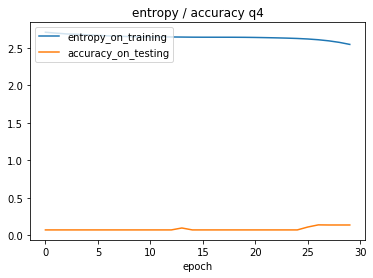

In [38]:
entropy_on_training = np.load(os.path.join('other', 'npy', 'entropy_on_training_q4.npy'), allow_pickle=True)
accuracy_on_testing = np.load(os.path.join('other', 'npy', 'accuracy_on_testing_q4.npy'), allow_pickle=True)

#plot
plt.figure()
plt.plot(entropy_on_training)
plt.plot(accuracy_on_testing)
plt.title('entropy / accuracy q4')
plt.xlabel('epoch')
plt.legend(['entropy_on_training', 'accuracy_on_testing',], loc='upper left')
plt.savefig(os.path.join('other', 'figure', 'q4.png'))